<a href="https://colab.research.google.com/github/mosh98/spotify_dataset_exploration/blob/master/Classifier_spotify_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




The following dataset is a collection of my own personal favourite songs that i listen to repeatedly

Goal of this exploration is to create a classifier and also to check out some interesting patterns using the given dataset.

**Downloading dataset and relevant Libraries**

In [73]:
!pip install spotipy

In [74]:
import pandas as pd 
import numpy as np
import spotipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#Return Dataframe 
of songs

In [75]:
sp = spotipy.Spotify() 

def return_song_df(song):
  ids = [] 
  
  for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
  
  features = sp.audio_features(ids) 
  df = pd.DataFrame(features)

  return df

In [76]:

from spotipy.oauth2 import SpotifyClientCredentials 
cid ="9b7b6880f95d47b2ba93f06224a89eda" 
secret = "f0c048093ab84d8d92d0deae19203a70" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
playlist = sp.user_playlist("Madafukin hype", "2g8hYJsoq6Px5CgI2AsVZQ?si=xs2njsOkTFqPJysUarlmWA") 
songs = playlist["tracks"]["items"] 

df = return_song_df(songs)

#Playlist of songs that i don't like
Persoanlly not a huge fan of rock music so yeah

In [77]:
playlist = sp.user_playlist("Rock 2020 - Best ROCK Songs Playlist (Rock Music 2020)", "1UyrGwXUiAZilemyfqA3vj?si=ScA1rbohS2qh2JOCsf-KzQ") 
songs = playlist["tracks"]["items"] 
df_song_i_dont_like = return_song_df(songs)

**Infomation about columns**
Audio features found from here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**dancebility -**

**key -** 
The estimated overall key of the track. Integers map to pitches using standard 

**mode **
 indicates the modality (major or minor) of a track [goes from 0-1]

**time_signature**
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)

**acousticness**
ranges form 0.0 to 1.0. a confidence measure, the higher the more acountic it is.

**energy** 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

##Time signature is now converted to class label







In [78]:
liked_columns = pd.DataFrame(np.ones( (df.shape[0],1) ) )
liked_columns

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [127]:
df['time_signature'] = pd.DataFrame(np.ones( (df.shape[0],1) ), index = df.index )
likedSong = df.replace({1.0:None})
likedSong = likedSong.replace({None:1})

#df

numpy.float64

In [128]:
likedSong

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.912,0.412,7,-8.074,1,0.1230,0.01650,0.012600,0.1040,0.4230,154.983,audio_features,0TlLq3lA83rQOYtrqBqSct,spotify:track:0TlLq3lA83rQOYtrqBqSct,https://api.spotify.com/v1/tracks/0TlLq3lA83rQ...,https://api.spotify.com/v1/audio-analysis/0TlL...,238614,1
1,0.838,0.771,1,-3.791,1,0.2440,0.01170,0.000000,0.0853,0.4050,175.957,audio_features,2DQ1ITjI0YoLFzuADN1ZBW,spotify:track:2DQ1ITjI0YoLFzuADN1ZBW,https://api.spotify.com/v1/tracks/2DQ1ITjI0YoL...,https://api.spotify.com/v1/audio-analysis/2DQ1...,245387,1
2,0.901,0.676,2,-7.033,1,0.2510,0.06460,0.000000,0.0863,0.4520,85.018,audio_features,5rU6kDNXZLXIinFezpbWbO,spotify:track:5rU6kDNXZLXIinFezpbWbO,https://api.spotify.com/v1/tracks/5rU6kDNXZLXI...,https://api.spotify.com/v1/audio-analysis/5rU6...,148278,1
3,0.831,0.502,10,-4.045,0,0.0460,0.10100,0.000000,0.1220,0.1010,100.541,audio_features,5ry2OE6R2zPQFDO85XkgRb,spotify:track:5ry2OE6R2zPQFDO85XkgRb,https://api.spotify.com/v1/tracks/5ry2OE6R2zPQ...,https://api.spotify.com/v1/audio-analysis/5ry2...,205427,1
4,0.906,0.545,11,-4.977,0,0.3440,0.18100,0.000000,0.0910,0.5430,139.932,audio_features,4NN6N5TxBO5k9uqu0W4gfQ,spotify:track:4NN6N5TxBO5k9uqu0W4gfQ,https://api.spotify.com/v1/tracks/4NN6N5TxBO5k...,https://api.spotify.com/v1/audio-analysis/4NN6...,186827,1
5,0.852,0.553,1,-7.286,1,0.1870,0.05590,0.000000,0.3320,0.6560,142.079,audio_features,27GmP9AWRs744SzKcpJsTZ,spotify:track:27GmP9AWRs744SzKcpJsTZ,https://api.spotify.com/v1/tracks/27GmP9AWRs74...,https://api.spotify.com/v1/audio-analysis/27Gm...,205879,1
6,0.607,0.783,9,-6.891,1,0.1390,0.00360,0.000000,0.2160,0.1820,87.026,audio_features,422lAAWQO9TqL1LxIPdhOn,spotify:track:422lAAWQO9TqL1LxIPdhOn,https://api.spotify.com/v1/tracks/422lAAWQO9Tq...,https://api.spotify.com/v1/audio-analysis/422l...,180333,1
7,0.672,0.655,10,-5.021,0,0.0311,0.03620,0.000000,0.1170,0.5560,134.945,audio_features,6Qn5zhYkTa37e91HC1D7lb,spotify:track:6Qn5zhYkTa37e91HC1D7lb,https://api.spotify.com/v1/tracks/6Qn5zhYkTa37...,https://api.spotify.com/v1/audio-analysis/6Qn5...,201240,1
8,0.944,0.613,10,-5.999,0,0.2910,0.00818,0.000000,0.0893,0.3280,120.102,audio_features,6e9biVAugkOfydEN8OiJpi,spotify:track:6e9biVAugkOfydEN8OiJpi,https://api.spotify.com/v1/tracks/6e9biVAugkOf...,https://api.spotify.com/v1/audio-analysis/6e9b...,170156,1
9,0.736,0.721,0,-4.778,1,0.0645,0.00977,0.000185,0.1490,0.2360,129.892,audio_features,5vXTilhr7U7Cv9KJ8peBGb,spotify:track:5vXTilhr7U7Cv9KJ8peBGb,https://api.spotify.com/v1/tracks/5vXTilhr7U7C...,https://api.spotify.com/v1/audio-analysis/5vXT...,154456,1


In [129]:
df_song_i_dont_like['time_signature'] = pd.DataFrame(np.zeros( (df_song_i_dont_like.shape[0],1) ), index = df_song_i_dont_like.index )
#df_song_i_dont_like = df.replace(1.0,1,inplace=True)
df_song_i_dont_like = df_song_i_dont_like.replace({0.0:None})
df_song_i_dont_like = df_song_i_dont_like.replace({None:0})

In [130]:
df_song_i_dont_like

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.599,0.787,2,-4.708,1,0.0338,0.000021,0.000053,0.0640,0.8220,114.065,audio_features,6ZtrGCcn38kGImt2GPFbJB,spotify:track:6ZtrGCcn38kGImt2GPFbJB,https://api.spotify.com/v1/tracks/6ZtrGCcn38kG...,https://api.spotify.com/v1/audio-analysis/6Ztr...,185133,0
1,0.477,0.471,6,-10.036,1,0.0277,0.193000,0.000002,0.1310,0.4230,81.204,audio_features,1JLn8RhQzHz3qDqsChcmBl,spotify:track:1JLn8RhQzHz3qDqsChcmBl,https://api.spotify.com/v1/tracks/1JLn8RhQzHz3...,https://api.spotify.com/v1/audio-analysis/1JLn...,304787,0
2,0.409,0.943,10,-4.056,1,0.0598,0.000086,0.105000,0.0938,0.4380,131.899,audio_features,1FBereoGKCn8BKqKheYw1z,spotify:track:1FBereoGKCn8BKqKheYw1z,https://api.spotify.com/v1/tracks/1FBereoGKCn8...,https://api.spotify.com/v1/audio-analysis/1FBe...,255218,0
3,0.664,0.828,0,-6.053,1,0.0404,0.008390,0.000000,0.2940,0.8200,103.985,audio_features,6GqqGv8frU7kqzXkm2rewI,spotify:track:6GqqGv8frU7kqzXkm2rewI,https://api.spotify.com/v1/tracks/6GqqGv8frU7k...,https://api.spotify.com/v1/audio-analysis/6Gqq...,190718,0
4,0.441,0.887,2,-5.044,1,0.0607,0.028600,0.025600,0.9490,0.3470,168.124,audio_features,616yLeci0BpJVGROFfVxMI,spotify:track:616yLeci0BpJVGROFfVxMI,https://api.spotify.com/v1/tracks/616yLeci0BpJ...,https://api.spotify.com/v1/audio-analysis/616y...,132987,0
5,0.502,0.943,4,-3.451,0,0.0398,0.000145,0.662000,0.6220,0.3600,114.024,audio_features,0G2xfxc8pWcHJ5tUVALSrq,spotify:track:0G2xfxc8pWcHJ5tUVALSrq,https://api.spotify.com/v1/tracks/0G2xfxc8pWcH...,https://api.spotify.com/v1/audio-analysis/0G2x...,257440,0
6,0.473,0.749,1,-5.047,0,0.0287,0.000466,0.000005,0.0883,0.1670,150.022,audio_features,5icbZiF6lcuEORG0UzMsS2,spotify:track:5icbZiF6lcuEORG0UzMsS2,https://api.spotify.com/v1/tracks/5icbZiF6lcuE...,https://api.spotify.com/v1/audio-analysis/5icb...,216627,0
7,0.442,0.915,9,-3.646,0,0.0434,0.000828,0.000021,0.3050,0.4110,76.010,audio_features,474cWGKmOKwDTmMUAAF6kj,spotify:track:474cWGKmOKwDTmMUAAF6kj,https://api.spotify.com/v1/tracks/474cWGKmOKwD...,https://api.spotify.com/v1/audio-analysis/474c...,261787,0
8,0.372,0.872,0,-3.582,1,0.0568,0.001040,0.000471,0.3570,0.2730,137.038,audio_features,6lsOCdPt1gUKjlysphTbPE,spotify:track:6lsOCdPt1gUKjlysphTbPE,https://api.spotify.com/v1/tracks/6lsOCdPt1gUK...,https://api.spotify.com/v1/audio-analysis/6lsO...,240217,0
9,0.438,0.826,10,-5.454,1,0.0750,0.005860,0.000009,0.3620,0.3780,144.149,audio_features,71JuDGXgyY7MbmXtldZ4C3,spotify:track:71JuDGXgyY7MbmXtldZ4C3,https://api.spotify.com/v1/tracks/71JuDGXgyY7M...,https://api.spotify.com/v1/audio-analysis/71Ju...,221947,0


#Concat the the two dataframe with shuffle

In [132]:
#Big data ;)
bigdata = likedSong.append(df_song_i_dont_like, ignore_index=True)
bigdata= bigdata.sample(frac=1).reset_index(drop=True)
bigdata

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.664,0.734,6,-5.848,1,0.0462,0.061400,0.725000,0.1260,0.864,97.997,audio_features,11LguGpEjOklkNQr70nrHQ,spotify:track:11LguGpEjOklkNQr70nrHQ,https://api.spotify.com/v1/tracks/11LguGpEjOkl...,https://api.spotify.com/v1/audio-analysis/11Lg...,305847,0
1,0.485,0.892,2,-3.586,0,0.0809,0.000443,0.000000,0.1000,0.576,142.046,audio_features,1kd5qplldnxu16qcZXS3Yk,spotify:track:1kd5qplldnxu16qcZXS3Yk,https://api.spotify.com/v1/tracks/1kd5qplldnxu...,https://api.spotify.com/v1/audio-analysis/1kd5...,279309,0
2,0.515,0.835,1,-4.777,1,0.0650,0.015300,0.000000,0.1150,0.746,169.889,audio_features,5McUAZ8KN76eDaTBV3uZS5,spotify:track:5McUAZ8KN76eDaTBV3uZS5,https://api.spotify.com/v1/tracks/5McUAZ8KN76e...,https://api.spotify.com/v1/audio-analysis/5McU...,188187,1
3,0.587,0.711,1,-6.330,1,0.4200,0.171000,0.000000,0.1250,0.381,98.008,audio_features,3muBQDekYAg7jm6hDu6R0Z,spotify:track:3muBQDekYAg7jm6hDu6R0Z,https://api.spotify.com/v1/tracks/3muBQDekYAg7...,https://api.spotify.com/v1/audio-analysis/3muB...,254694,1
4,0.838,0.771,1,-3.791,1,0.2440,0.011700,0.000000,0.0853,0.405,175.957,audio_features,2DQ1ITjI0YoLFzuADN1ZBW,spotify:track:2DQ1ITjI0YoLFzuADN1ZBW,https://api.spotify.com/v1/tracks/2DQ1ITjI0YoL...,https://api.spotify.com/v1/audio-analysis/2DQ1...,245387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.831,0.502,10,-4.045,0,0.0460,0.101000,0.000000,0.1220,0.101,100.541,audio_features,5ry2OE6R2zPQFDO85XkgRb,spotify:track:5ry2OE6R2zPQFDO85XkgRb,https://api.spotify.com/v1/tracks/5ry2OE6R2zPQ...,https://api.spotify.com/v1/audio-analysis/5ry2...,205427,1
86,0.442,0.915,9,-3.646,0,0.0434,0.000828,0.000021,0.3050,0.411,76.010,audio_features,474cWGKmOKwDTmMUAAF6kj,spotify:track:474cWGKmOKwDTmMUAAF6kj,https://api.spotify.com/v1/tracks/474cWGKmOKwD...,https://api.spotify.com/v1/audio-analysis/474c...,261787,0
87,0.770,0.892,6,-4.724,1,0.2200,0.137000,0.000000,0.1090,0.840,91.123,audio_features,6Js9pKLTyVw7xZQ1MIjkVo,spotify:track:6Js9pKLTyVw7xZQ1MIjkVo,https://api.spotify.com/v1/tracks/6Js9pKLTyVw7...,https://api.spotify.com/v1/audio-analysis/6Js9...,138243,1
88,0.679,0.697,4,-5.369,0,0.0454,0.014800,0.011900,0.1240,0.776,110.558,audio_features,5RrrQhJKKKMJt3wB5n2N3t,spotify:track:5RrrQhJKKKMJt3wB5n2N3t,https://api.spotify.com/v1/tracks/5RrrQhJKKKMJ...,https://api.spotify.com/v1/audio-analysis/5Rrr...,247011,0


Drop a few attributes

namely: uri,track_href,analysis_url.id,type, liveness

In [83]:
def drop_unnecerray_attributes(data):

  polished_data = data.drop(['type','id','track_href','analysis_url','duration_ms','liveness','uri','mode'],axis=1)

  return polished_data

In [84]:
new_data = drop_unnecerray_attributes(bigdata)
#new_data.describe()
new_data

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,0.819,0.621,0,-6.131,0.1390,0.108000,0.000009,0.556,132.805,1.0
1,0.664,0.828,0,-6.053,0.0404,0.008390,0.000000,0.820,103.985,0.0
2,0.868,0.661,2,-3.670,0.2330,0.076900,0.000007,0.482,165.020,1.0
3,0.501,0.992,4,-2.137,0.1570,0.000225,0.000001,0.157,146.968,0.0
4,0.358,0.644,5,-8.027,0.0811,0.154000,0.000000,0.436,152.085,1.0
...,...,...,...,...,...,...,...,...,...,...
85,0.344,0.843,1,-3.711,0.0422,0.021400,0.003450,0.219,97.500,1.0
86,0.838,0.771,1,-3.791,0.2440,0.011700,0.000000,0.405,175.957,1.0
87,0.611,0.804,1,-5.633,0.2760,0.041000,0.000000,0.374,162.087,1.0
88,0.671,0.565,11,-7.401,0.1600,0.274000,0.000065,0.561,150.014,1.0


#Valence and Acousticness
Trying to find out potential relationship between songs with valence and acousticness

**Results**: The data shows the lower the acousticness is the lower the valence levels are, and hence ther person who lsitens to this plalist happens to like a little happier songs.


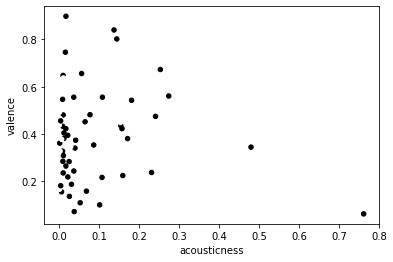

In [85]:
 valence_acousticness = new_data[ ['valence','acousticness'] ]
 valence_acousticness.plot.scatter(x = 'acousticness',y ='valence',c=bigdata['time_signature'])
 

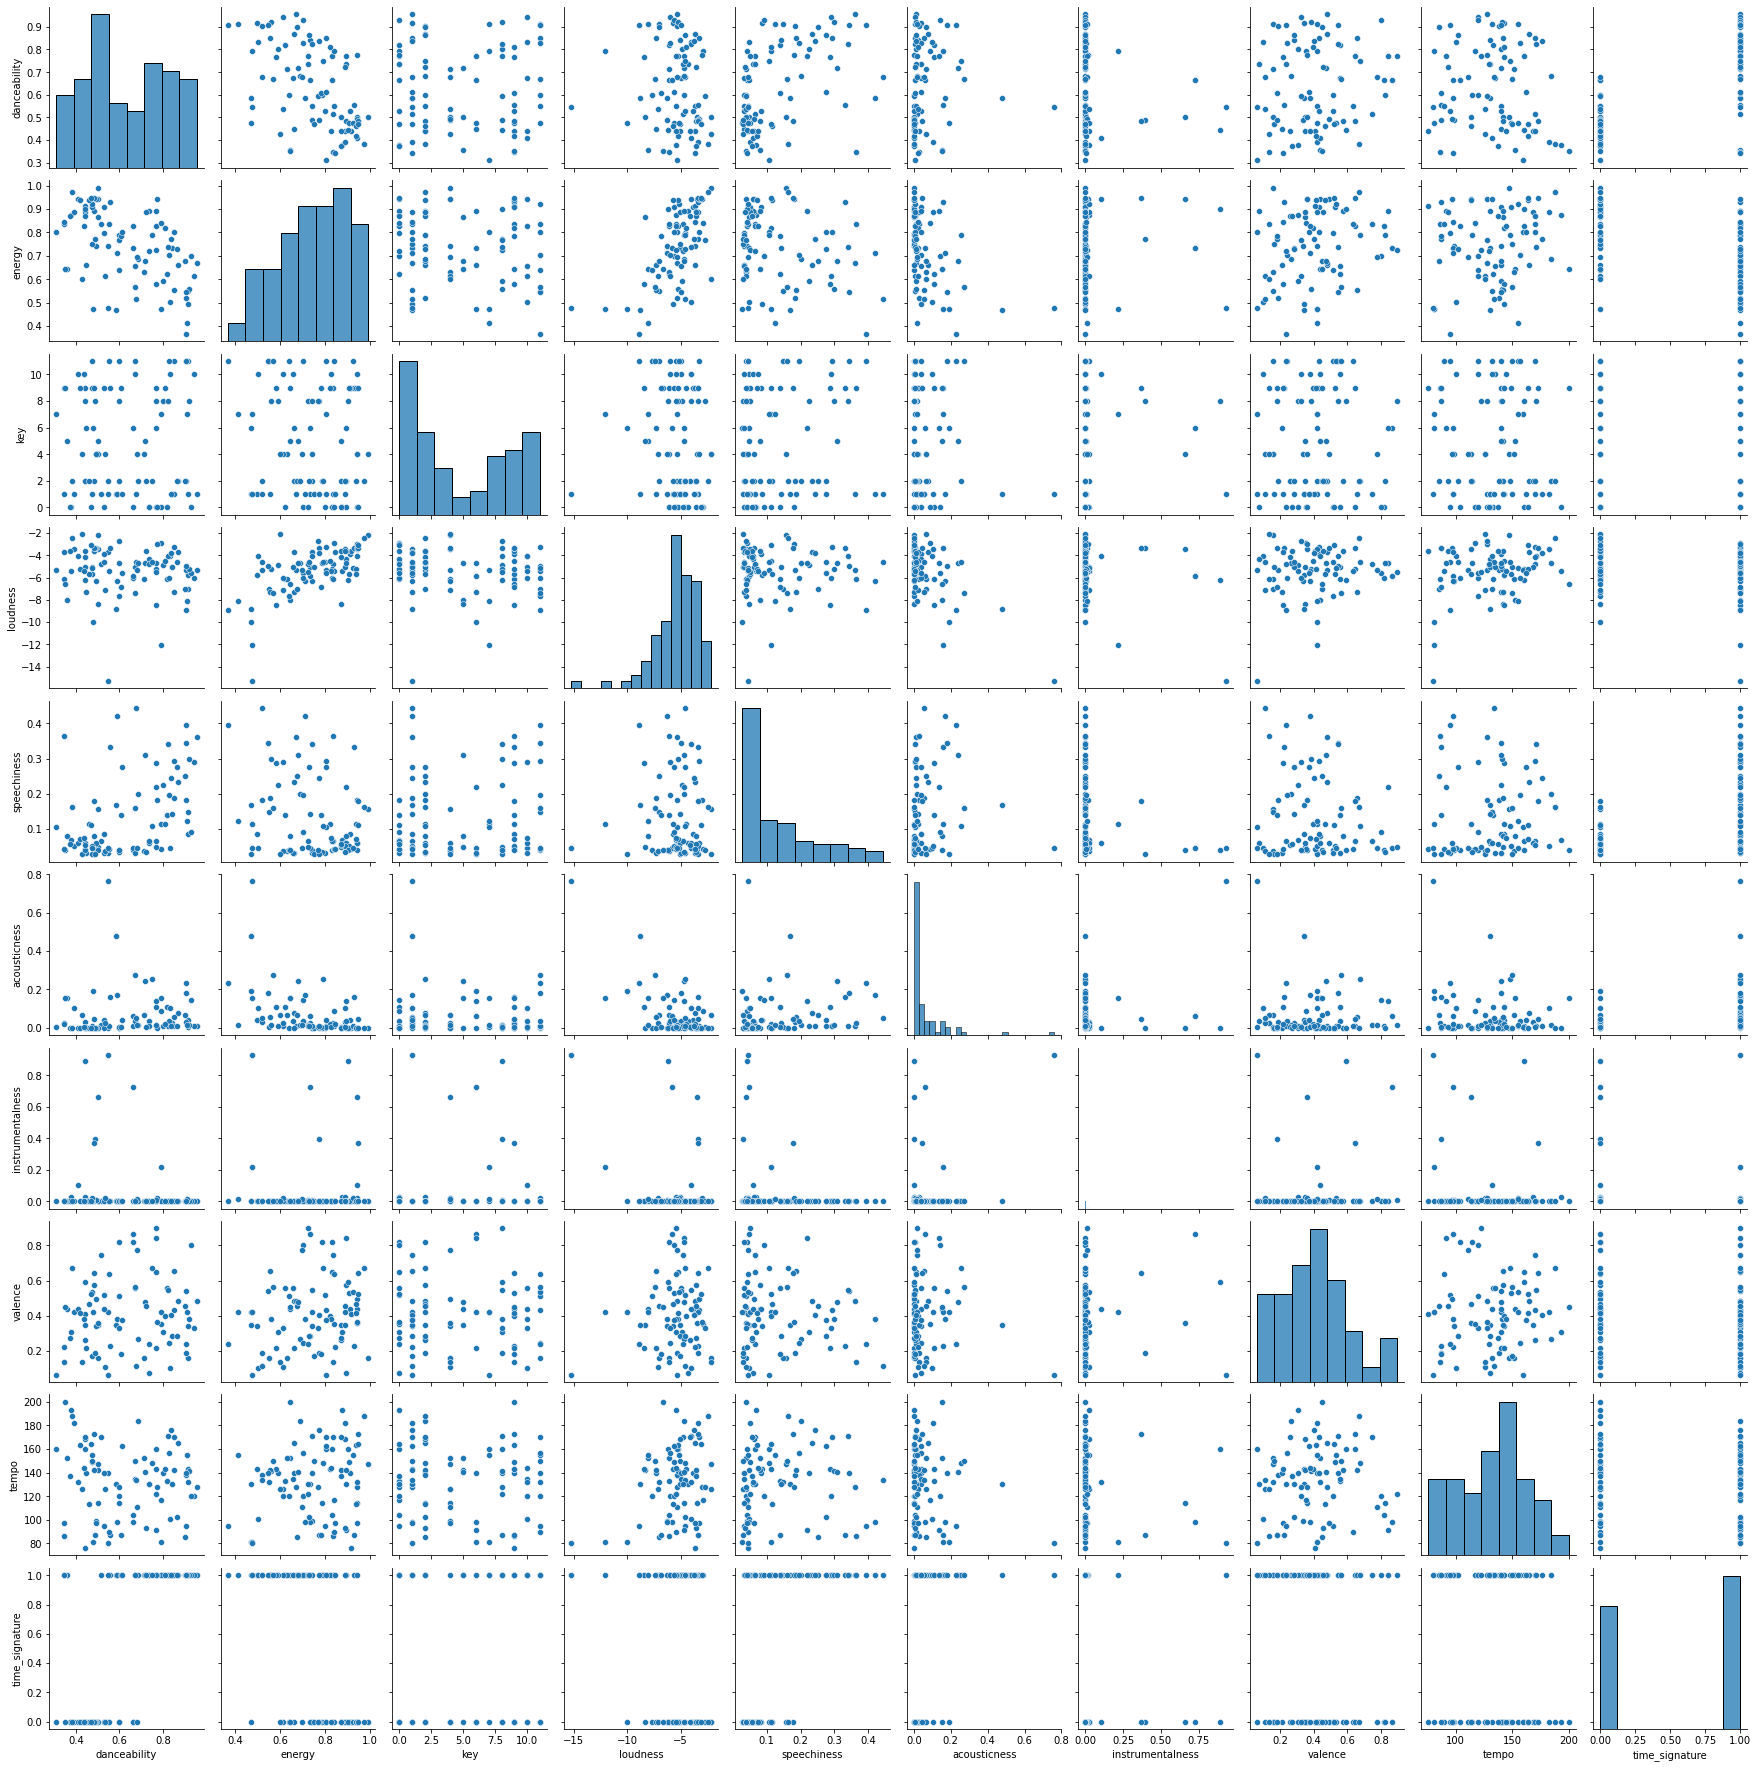

In [86]:

#didn't need to take a small sample of data as the data consists of 29 rows anyways.
#Quick PairPlot cuz why not kid
#sns.pairplot( new_data  )

#HeatMap

#Splitting the Data

In [87]:
X = new_data.drop( 'time_signature',axis = 1)
y= new_data['time_signature'] #class label

In [88]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#print( "Training size:", len(train), "Test Size:", len(test) )
X_train,X_test,y_train,y_test, = train_test_split(X,y, test_size=0.3,stratify=y)


#Feature Scaling For Classification

In [89]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(new_data)

data_standardized



array([[ 1.00577504e+00, -8.12238593e-01, -1.25175560e+00,
        -3.72144835e-01,  7.34605558e-02,  4.45189352e-01,
        -2.83869587e-01,  7.39027366e-01,  7.39356998e-03,
         8.94427191e-01],
       [ 1.62896162e-01,  5.58289891e-01, -1.25175560e+00,
        -3.34145465e-01, -8.25324737e-01, -4.64551077e-01,
        -2.83920736e-01,  2.06485719e+00, -9.65932411e-01,
        -1.11803399e+00],
       [ 1.27223352e+00, -5.47402171e-01, -7.37335492e-01,
         8.26784032e-01,  9.30314689e-01,  1.61152334e-01,
        -2.83878845e-01,  3.67393248e-01,  1.09537749e+00,
         8.94427191e-01],
       [-7.23486143e-01,  1.64411922e+00, -2.22915381e-01,
         1.57361782e+00,  2.37539007e-01, -5.39122210e-01,
        -2.83914907e-01, -1.26478362e+00,  4.85714731e-01,
        -1.11803399e+00],
       [-1.50110988e+00, -6.59957650e-01,  3.42946741e-02,
        -1.29582185e+00, -4.54325128e-01,  8.65308414e-01,
        -2.83920736e-01,  1.36377445e-01,  6.58529063e-01,
         8.

**Dimentionality Reduction**


> PCA






In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(data_standardized)
pca.transform(data_standardized)

col = list(new_data.columns)

df_principal_components = pd.DataFrame(pca.components_, columns=col)
df_principal_components
#plt.scatter.plot()


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,0.406955,-0.476445,0.055054,-0.354745,0.325925,0.350364,0.009062,-0.109145,-0.159859,0.460414
1,-0.337868,-0.085384,0.079888,-0.441823,-0.358933,0.380857,0.501129,-0.045141,-0.260506,-0.286442
2,0.243988,0.119905,-0.547590,0.026903,-0.125466,0.153541,0.214867,0.723620,-0.022625,0.126062
3,-0.203923,-0.031898,-0.748130,-0.005865,-0.058576,0.212994,-0.108491,-0.520507,0.245855,0.075666
4,-0.083045,-0.137165,0.215121,-0.175937,0.056641,0.184997,0.086925,0.202045,0.899173,-0.052310
5,-0.066356,0.404557,0.051268,0.291114,0.531769,0.156052,0.620031,-0.168157,0.021581,0.155703
6,0.445258,-0.231482,-0.037259,0.096167,-0.392999,-0.460424,0.515515,-0.271863,0.167630,0.057633
7,-0.057232,-0.220268,-0.283547,-0.360614,0.546314,-0.456943,0.116838,0.089674,-0.039939,-0.455215


In [ ]:
#pca = PCA().fit(data_standardized)

#% matplotlib inline
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (12,6)

#fig, ax = plt.subplots()
#xi = np.arange(1, 11, step=1)
#y = np.cumsum(pca.explained_variance_ratio_)

#plt.ylim(0.0,1.1)
#plt.plot(xi, y, marker='o', linestyle='--', color='b')

#plt.xlabel('Number of Components')
#plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
#plt.ylabel('Cumulative variance (%)')
#plt.title('The number of components needed to explain variance')

#plt.axhline(y=0.95, color='r', linestyle='-')


#ax.grid(axis='x')
#plt.show()

#Heatmap
after dimentionality reduction, we can observe some interesting findings  for the foollowing features

 Speechness 
 
 key

 Valence

 Tempo

 Instrumentalness

 Acousticness

 Danceability


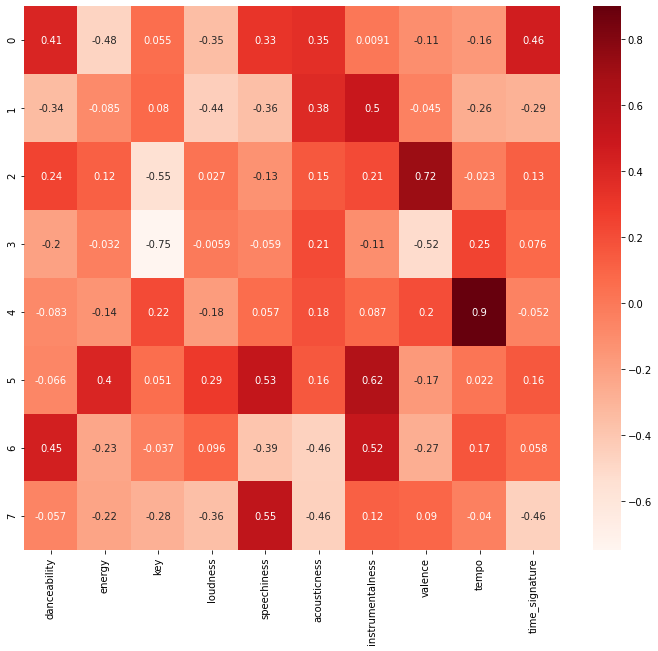

In [93]:
plt.figure(figsize=(12,10))
sns.heatmap(df_principal_components,annot=True,cmap=plt.cm.Reds)



Data Split

#K-NN

In [94]:
from sklearn.neighbors import KNeighborsClassifier


In [95]:
classifier = KNeighborsClassifier(n_neighbors=  5,metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
classifier.predict


<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

#Random Forest


In [111]:
clf = RandomForestClassifier(n_estimators= 10, random_state = 12345, criterion='entropy',)
clf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)